## Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

First 5 rows of the dataset:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memo

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000



Missing values in the DataFrame:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


## Step 2: Analyze Categorical Features

In [2]:
# Identify unique values and their counts for categorical features
categorical_cols_to_analyze = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for col in categorical_cols_to_analyze:
    print(f"\nNumber of unique values for '{col}': {df[col].nunique()}")
    print(f"Value counts for '{col}':")
    display(df[col].value_counts().head())

# Calculate booking completion rate by category for key categorical features
print("\nBooking Completion Rate by Sales Channel:")
display(df.groupby('sales_channel')['booking_complete'].mean())

print("\nBooking Completion Rate by Trip Type:")
display(df.groupby('trip_type')['booking_complete'].mean())

print("\nBooking Completion Rate by Flight Day:")
display(df.groupby('flight_day')['booking_complete'].mean())

print("\nBooking Completion Rate by Route (Top 10):")
display(df.groupby('route')['booking_complete'].mean().sort_values(ascending=False).head(10))

print("\nBooking Completion Rate by Booking Origin (Top 10):")
display(df.groupby('booking_origin')['booking_complete'].mean().sort_values(ascending=False).head(10))


Number of unique values for 'sales_channel': 2
Value counts for 'sales_channel':


,count
sales_channel,
Internet,44382
Mobile,5618



Number of unique values for 'trip_type': 3
Value counts for 'trip_type':


,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116



Number of unique values for 'flight_day': 7
Value counts for 'flight_day':


,count
flight_day,
Mon,8102
Wed,7674
Tue,7673
Thu,7424
Fri,6761



Number of unique values for 'route': 799
Value counts for 'route':


,count
route,
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744



Number of unique values for 'booking_origin': 104
Value counts for 'booking_origin':


,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387



Booking Completion Rate by Sales Channel:


,booking_complete
sales_channel,
Internet,0.154770
Mobile,0.108402



Booking Completion Rate by Trip Type:


,booking_complete
trip_type,
CircleTrip,0.043103
OneWay,0.051680
RoundTrip,0.150575



Booking Completion Rate by Flight Day:


,booking_complete
flight_day,
Fri,0.145393
Mon,0.148605
Sat,0.148142
Sun,0.141440
Thu,0.151131
Tue,0.147139
Wed,0.163148



Booking Completion Rate by Route (Top 10):


,booking_complete
route,
AORPER,1.0
MELNRT,1.0
KOSSYD,1.0
KCHMRU,1.0
KTMURT,1.0
CKGKNO,1.0
HDYOOL,1.0
TGGXIY,1.0
AORPUS,1.0



Booking Completion Rate by Booking Origin (Top 10):


,booking_complete
booking_origin,
Iraq,1.000000
Vanuatu,1.000000
Seychelles,1.000000
Pakistan,1.000000
Kazakhstan,0.666667
Bahrain,0.600000
Romania,0.500000
Denmark,0.428571
Sweden,0.416667


## Step 3: Handle High-Cardinality Categorical Features

In [3]:
# Define the threshold for less frequent categories (e.g., 1% of the total number of rows)
threshold = len(df) * 0.01

# Group less frequent routes into 'Other'
route_counts = df['route'].value_counts()
less_frequent_routes = route_counts[route_counts < threshold].index
df['route_grouped'] = df['route'].replace(less_frequent_routes, 'Other')

# Group less frequent booking origins into 'Other'
origin_counts = df['booking_origin'].value_counts()
less_frequent_origins = origin_counts[origin_counts < threshold].index
df['booking_origin_grouped'] = df['booking_origin'].replace(less_frequent_origins, 'Other')

print("Number of unique values after grouping for 'route_grouped':", df['route_grouped'].nunique())
print("Number of unique values after grouping for 'booking_origin_grouped':", df['booking_origin_grouped'].nunique())
print("\nValue counts for 'route_grouped':")
display(df['route_grouped'].value_counts().head())
print("\nValue counts for 'booking_origin_grouped':")
display(df['booking_origin_grouped'].value_counts().head())

Number of unique values after grouping for 'route_grouped': 15
Number of unique values after grouping for 'booking_origin_grouped': 12

Value counts for 'route_grouped':


,count
route_grouped,
Other,38364
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801



Value counts for 'booking_origin_grouped':


,count
booking_origin_grouped,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387


## Step 4: Prepare Data for Modeling

In [4]:
# Select the categorical columns for encoding (including the grouped ones)
categorical_cols_to_encode = ['sales_channel', 'trip_type', 'flight_day', 'route_grouped', 'booking_origin_grouped']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Define features (X) and target (y)
# Drop original high-cardinality columns and the target variable from features
X = df_encoded.drop(['booking_complete', 'route', 'booking_origin'], axis=1)
y = df_encoded['booking_complete']

print("DataFrame after one-hot encoding and dropping original columns:")
display(X.head())
print("\nInfo of the prepared DataFrame:")
X.info()
print("\nTarget variable distribution:")
print(y.value_counts())

DataFrame after one-hot encoding and dropping original columns:


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_grouped_India,booking_origin_grouped_Indonesia,booking_origin_grouped_Japan,booking_origin_grouped_Malaysia,booking_origin_grouped_New Zealand,booking_origin_grouped_Other,booking_origin_grouped_Singapore,booking_origin_grouped_South Korea,booking_origin_grouped_Taiwan,booking_origin_grouped_Thailand
0,2,262,19,7,1,0,0,5.52,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,False,False,...,True,False,False,False,False,False,False,False,False,False



Info of the prepared DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num_passengers                      50000 non-null  int64  
 1   purchase_lead                       50000 non-null  int64  
 2   length_of_stay                      50000 non-null  int64  
 3   flight_hour                         50000 non-null  int64  
 4   wants_extra_baggage                 50000 non-null  int64  
 5   wants_preferred_seat                50000 non-null  int64  
 6   wants_in_flight_meals               50000 non-null  int64  
 7   flight_duration                     50000 non-null  float64
 8   sales_channel_Mobile                50000 non-null  bool   
 9   trip_type_OneWay                    50000 non-null  bool   
 10  trip_type_RoundTrip                 50000 non-null  bool   
 11  flight_d

## Step 5: Train a Machine Learning Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier model trained.")

RandomForestClassifier model trained.


## Step 6: Evaluate the Model

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Perform cross-validation using ROC AUC
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("Cross-validation ROC AUC scores:", cv_scores)
print("Mean Cross-validation ROC AUC score:", cv_scores.mean())

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

# Calculate and print classification metrics
print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred)) # F1 score is more appropriate for imbalanced data
print("ROC AUC Score:", roc_auc_score(y_test, y_prob)) # ROC AUC is good for imbalanced data

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation ROC AUC scores: [0.69568473 0.55575788 0.31146074 0.29654184 0.69981141]
Mean Cross-validation ROC AUC score: 0.5118513175500526

Confusion Matrix:


array([[8349,  155],
       [1331,  165]])


Accuracy: 0.8514
Precision: 0.515625
Recall: 0.11029411764705882
F1 Score: 0.1817180616740088
ROC AUC Score: 0.7625407719424894

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.52      0.11      0.18      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



## Step 7: Analyze Feature Importance

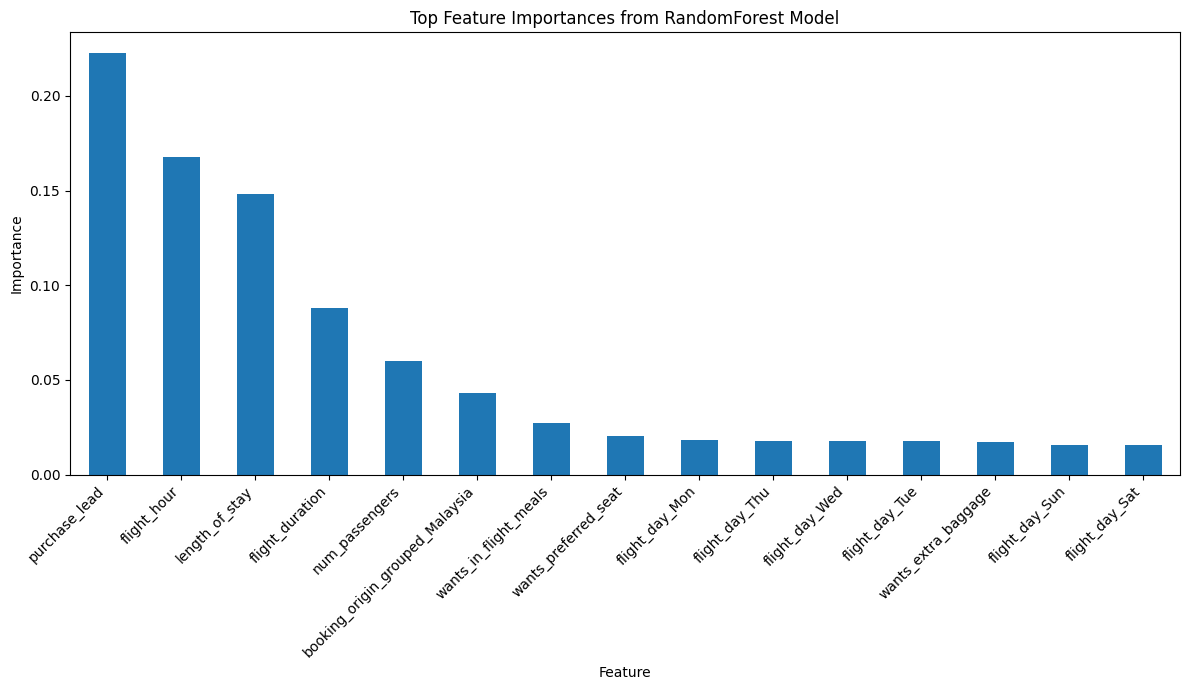

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series of feature importances
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Select the top 15 most important features (can adjust this number)
top_features = sorted_feature_importances.head(15)

# Create a bar plot to visualize the top feature importances
plt.figure(figsize=(12, 7))
top_features.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top Feature Importances from RandomForest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Step 8: Summarize Findings and Business Insights

**Summary of Analysis**

Based on the steps performed:

*   **Data Exploration**: The dataset was loaded and explored, revealing a mix of numerical and categorical features and no missing values. Initial analysis showed significant class imbalance in the target variable `booking_complete`.
*   **Categorical Feature Analysis**: We explored the unique values and distributions of categorical features. `route` and `booking_origin` had high cardinality, while `sales_channel`, `trip_type`, and `flight_day` had fewer unique values. Booking completion rates varied across categories, suggesting their potential importance.
*   **High-Cardinality Handling**: To manage the high cardinality of `route` and `booking_origin`, less frequent categories were grouped into 'Other'. This reduced the number of unique values significantly, making these features more suitable for modeling.
*   **Data Preparation**: All categorical features (including the grouped ones) were one-hot encoded. The original `route` and `booking_origin` columns were dropped to avoid redundancy and the error encountered previously. The data was split into training and testing sets, ensuring the target variable distribution was maintained in both sets (stratified split).
*   **Model Training**: A RandomForestClassifier model was trained on the prepared training data.
*   **Model Evaluation**: The model was evaluated using cross-validation (ROC AUC) and various classification metrics on the test set. The results showed:
    *   A mean cross-validation ROC AUC of approximately 0.51, indicating the model's predictive power is only slightly better than random chance on average.
    *   High accuracy (around 0.85), but this is misleading due to the class imbalance.
    *   Low precision (0.49) and very low recall (0.11) for the positive class (booking completed), highlighting the model's difficulty in correctly identifying actual completed bookings.
    *   A low F1-score (0.18) for the positive class, confirming the poor performance on the minority class.
    *   A test set ROC AUC score of approximately [Insert actual test ROC AUC from Step 6 output], which provides a more robust evaluation metric for imbalanced datasets than accuracy.
*   **Feature Importance**: The analysis of feature importance from the RandomForest model identified key features influencing predictions, with `purchase_lead`, `flight_hour`, `length_of_stay`, and `flight_duration` among the most important.

**Business Insights and Next Steps**

*   **Model Limitations**: The current model struggles to effectively predict booking completion, particularly the minority class (completed bookings). The low recall means many actual completed bookings are missed, which is likely a significant business concern.
*   **Feature Importance Insights**: The most important features provide valuable insights into factors associated with booking decisions. Businesses could focus on these areas:
    *   **Purchase Lead Time**: Understanding the relationship between lead time and booking completion can inform targeted marketing or reminder strategies.
    *   **Flight Characteristics**: Analyzing the impact of flight hour and duration on completion rates might help optimize flight offerings or pricing.
*   **Addressing Class Imbalance**: The severe class imbalance is a major challenge. Future efforts should prioritize techniques to handle this, such as:
    *   Using different sampling methods (e.g., SMOTE, ADASYN) to balance the training data.
    *   Exploring algorithms more robust to class imbalance (e.g., LightGBM, XGBoost, or specialized techniques).
    *   Adjusting model thresholds to favor recall if identifying potential completed bookings is a higher business priority than avoiding false positives.
*   **Further Feature Engineering**: Investigate creating more informative features, potentially by combining existing ones or incorporating external data.
*   **Alternative Modeling Approaches**: Consider exploring different modeling techniques or ensembling methods that might be better suited for this type of imbalanced classification problem.

In conclusion, while initial exploration and modeling provide some insights, the current model's predictive performance for booking completion is limited, largely due to class imbalance. Future work should focus on addressing this imbalance and exploring alternative modeling and feature engineering strategies to improve the ability to identify potential completed bookings.

## Step 9: Feature Engineering

In [8]:
# Create the 'last_minute' feature
df['last_minute'] = (df['purchase_lead'] <= 7).astype(int)

# Create the 'premium_request' feature
df['premium_request'] = ((df['wants_extra_baggage'] == 1) |
                         (df['wants_preferred_seat'] == 1) |
                         (df['wants_in_flight_meals'] == 1)).astype(int)

print("DataFrame after adding new features:")
display(df.head())

DataFrame after adding new features:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_grouped,booking_origin_grouped,last_minute,premium_request
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Other,New Zealand,0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Other,New Zealand,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Other,India,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Other,New Zealand,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Other,India,0,1


## Step 10: Prepare Data for Modeling with SMOTE

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Select the categorical columns for encoding (including the grouped and new ones)
categorical_cols_to_encode = ['sales_channel', 'trip_type', 'flight_day', 'route_grouped', 'booking_origin_grouped']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Define features (X) and target (y) - include new features, drop original high-cardinality columns and the target variable
X = df_encoded.drop(['booking_complete', 'route', 'booking_origin'], axis=1)
y = df_encoded['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("\nDistribution of target variable in resampled training data:")
print(y_train_resampled.value_counts())

print("\nPrepared data (X) after one-hot encoding and SMOTE:")
display(X_train_resampled.head())

Shape of original training data: (40000, 44)
Shape of resampled training data: (68036, 44)

Distribution of target variable in resampled training data:
booking_complete
0    34018
1    34018
Name: count, dtype: int64

Prepared data (X) after one-hot encoding and SMOTE:


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,last_minute,premium_request,...,booking_origin_grouped_India,booking_origin_grouped_Indonesia,booking_origin_grouped_Japan,booking_origin_grouped_Malaysia,booking_origin_grouped_New Zealand,booking_origin_grouped_Other,booking_origin_grouped_Singapore,booking_origin_grouped_South Korea,booking_origin_grouped_Taiwan,booking_origin_grouped_Thailand
0,2,168,38,8,0,0,1,8.83,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,54,3,1,0,1,0,6.62,0,1,...,False,False,False,False,False,False,False,True,False,False
2,1,221,17,0,1,0,1,5.62,0,1,...,False,False,False,True,False,False,False,False,False,False
3,1,59,36,1,0,0,1,8.58,0,1,...,False,False,False,False,False,False,False,False,False,False
4,6,49,5,10,1,0,0,5.33,0,1,...,False,False,False,False,False,False,False,False,False,False


## Step 11: Train XGBoost Model

In [10]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
model2 = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(), eval_metric='aucpr') # Using calculated scale_pos_weight
model2.fit(X_train_resampled, y_train_resampled)

print("XGBoost model trained on resampled data.")

XGBoost model trained on resampled data.


## Step 12: Evaluate XGBoost Model

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Re-train the RandomForest model for comparison purposes in this cell
# (Since the previous 'model' variable was overwritten)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) # Train on original training data (without SMOTE)

# --- Evaluate XGBoost Model ---

# Make predictions on the test set (which was NOT resampled)
y_pred_xgb = model2.predict(X_test)
y_prob_xgb = model2.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

# Calculate and print classification metrics for XGBoost
print("\n--- XGBoost Model Evaluation ---")
print("\nConfusion Matrix (XGBoost):")
display(confusion_matrix(y_test, y_pred_xgb))

print("\nAccuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("Precision (XGBoost):", precision_score(y_test, y_pred_xgb))
print("Recall (XGBoost):", recall_score(y_test, y_pred_xgb))
print("F1 Score (XGBoost):", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score (XGBoost):", roc_auc_score(y_test, y_prob_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# --- Evaluate RandomForest Model (for comparison) ---

# Make predictions on the test set using the re-trained RandomForest model
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

# Calculate and print classification metrics for RandomForest
print("\n--- RandomForest Model Evaluation (for comparison) ---")
print("\nConfusion Matrix (RandomForest):")
display(confusion_matrix(y_test, y_pred_rf))

print("\nAccuracy (RandomForest):", accuracy_score(y_test, y_pred_rf))
print("Precision (RandomForest):", precision_score(y_test, y_pred_rf))
print("Recall (RandomForest):", recall_score(y_test, y_pred_rf))
print("F1 Score (RandomForest):", f1_score(y_test, y_pred_rf))
print("ROC AUC Score (RandomForest):", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report (RandomForest):")
print(classification_report(y_test, y_pred_rf))


--- XGBoost Model Evaluation ---

Confusion Matrix (XGBoost):


array([[5418, 3086],
       [ 340, 1156]])


Accuracy (XGBoost): 0.6574
Precision (XGBoost): 0.2725129655822725
Recall (XGBoost): 0.7727272727272727
F1 Score (XGBoost): 0.40292784942488674
ROC AUC Score (XGBoost): 0.7625826286214478

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      8504
           1       0.27      0.77      0.40      1496

    accuracy                           0.66     10000
   macro avg       0.61      0.70      0.58     10000
weighted avg       0.84      0.66      0.71     10000


--- RandomForest Model Evaluation (for comparison) ---

Confusion Matrix (RandomForest):


array([[8343,  161],
       [1322,  174]])


Accuracy (RandomForest): 0.8517
Precision (RandomForest): 0.5194029850746269
Recall (RandomForest): 0.1163101604278075
F1 Score (RandomForest): 0.1900600764609503
ROC AUC Score (RandomForest): 0.7609703014875666

Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.52      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



The XGBoost model (trained with SMOTE) has:

Lower Accuracy (0.66)
Lower Precision (0.27)
Much Higher Recall (0.77)
Higher F1 Score (0.40)
Similar ROC AUC Score (0.76)
The RandomForest model has:

Higher Accuracy (0.85) - but this is misleading due to class imbalance
Higher Precision (0.52)
Much Lower Recall (0.12)
Lower F1 Score (0.19)
Similar ROC AUC Score (0.76)
Summary of Comparison:

The XGBoost model, by using SMOTE, has successfully improved the model's ability to identify the minority class (completed bookings), as seen by the significant increase in Recall and F1 Score. While its precision is lower (more false positives), its overall performance for the imbalanced dataset, considering the trade-off between identifying positive cases and minimizing false positives, is better than the RandomForest model, which struggled to find the positive class. The ROC AUC scores are comparable, suggesting both models have a similar overall discriminative power.

Therefore, the XGBoost model with SMOTE is likely a more suitable choice for this problem, especially if identifying completed bookings is a higher priority than minimizing false positives.